In [2]:
import pandas as pd

# Census 2016

In [3]:
# data source did not specify enconding and UTF-8 did not work, but ISO-8859-1 did
# skip rows because source table is not aligned to csv top left corner
census2016 = pd.read_csv('../data/CensusLocalAreaProfiles2016.csv', encoding="iso-8859-1", skiprows=4)
census2016.columns = census2016.columns.str.strip() # trim extra space from neighborhood names

# prepend variable name with variable ID to ensure it's unique to use it as index
census2016["AREA"] = census2016["ID"].str.strip() + " - " + census2016["Variable"].str.strip()
census2016.set_index('AREA', inplace=True)

# drop ID and aggregated columns because they're not at the neighborhood level
census2016.drop(columns=[
    "ID",
    "Vancouver CSD",
    "Vancouver CMA",
    "Variable",
], inplace=True)

census2016 = census2016.transpose()[[
    "1858 - Average total income in 2015 among recipients ($)",
    "4102 - Average value of dwellings ($)",
    "4108 - Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data",
    "4111 - Postsecondary certificate, diploma or degree",
    "2190 - Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data",
    "2193 - 0 Management occupations",
]].astype(int)


# calculate the incidence of postsecondary certificate as a proportion of total population

census2016["POSTSECONDARY_PCT_2016"] = census2016["4111 - Postsecondary certificate, diploma or degree"]/census2016["4108 - Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data"]

# calculate the incidence of management occupations as a proportion of total labour force

census2016["MANAGEMENT_PCT_2016"] = census2016["2193 - 0 Management occupations"]/census2016["2190 - Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data"]


#drop columns previously used to aggregate information

census2016.drop(columns=[
    "4108 - Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data",
    "4111 - Postsecondary certificate, diploma or degree",
    "2190 - Total labour force population aged 15 years and over by occupation - National Occupational Classification (NOC) 2016 - 25% sample data",
    "2193 - 0 Management occupations",
], inplace=True)


census2016 = census2016.rename({
    "1858 - Average total income in 2015 among recipients ($)":"AVG_INCOME_2016",
    "4102 - Average value of dwellings ($)":"AVG_VALUE_DWELLINGS_2016",
}, axis=1)


census2016.head()

AREA,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016
Arbutus-Ridge,62675,2500033,0.649560,0.193358
Downtown,63251,941493,0.767143,0.177683
Dunbar-Southlands,78117,3026785,0.691400,0.176039
Fairview,61627,761230,0.792365,0.138007
Grandview-Woodland,42896,899002,0.625699,0.100157


# Census 2006

In [4]:
# data source did not specify enconding and UTF-8 did not work, but ISO-8859-1 did
# skip rows because source table is not aligned to csv top left corner
census2006 = pd.read_csv('../data/CensusLocalAreaProfiles2006.csv', encoding="iso-8859-1", skiprows=4)
census2006.columns = census2006.columns.str.strip() # trim extra space from neighborhood names

# prepend variable name with variable id to ensure it's unique to use it as index
census2006["AREA"] = census2006.index.map(str) + " - " + census2006["Unnamed: 0"].str.strip()
census2006.set_index('AREA', inplace=True)

# drop unnamed and aggregated columns because they're not at the neighborhood level
census2006.drop(columns=[
    "Unnamed: 0",
    "Vancouver CSD (City of Vancouver)",
    "Vancouver CMA  (Metro Vancouver)",
], inplace=True)

census2006 = census2006.transpose()[[
    "1381 - Average income $",
    "1954 - Average value of dwelling $",
    "1031 - Total population 15 to 24 years by highest certificate, diploma or degree",
    "1045 - Total population 25 to 64 years by highest certificate, diploma or degree",
    "1059 - Total population 65 years and over by highest certificate, diploma or degree",
    "1035 - Apprenticeship or trades certificate or diploma",
    "1036 - College, CEGEP or other non-university certificate or diploma",
    "1037 - University certificate, diploma or degree",
    "1049 - Apprenticeship or trades certificate or diploma",
    "1050 - College, CEGEP or other non-university certificate or diploma",
    "1051 - University certificate, diploma or degree",
    "1063 - Apprenticeship or trades certificate or diploma",
    "1064 - College, CEGEP or other non-university certificate or diploma",
    "1065 - University certificate, diploma or degree",
    "624 - Total labour force 15 years and over by occupation - National Occupational Classification for Statistics 2006",
    "627 - A Management occupations",
]]

# convert values into integers

def parse_number(string: str):
    return int(
        string
        .replace("$", "")
        .replace(",", "")
    )

census2006 = census2006.applymap(parse_number)


# aggregate contents of highest certificate, diploma or degree for total population

census2006["Total - Highest certificate, diploma or degree for the population aged 15 years and over"] = census2006["1031 - Total population 15 to 24 years by highest certificate, diploma or degree"] + census2006["1045 - Total population 25 to 64 years by highest certificate, diploma or degree"] + census2006["1059 - Total population 65 years and over by highest certificate, diploma or degree"]

# aggregate contents of postsecondary certificate, diploma or degree and recalculate it as a percentage of overall residents

census2006["Postsecondary certificate, diploma or degree"] = census2006["1035 - Apprenticeship or trades certificate or diploma"] + census2006["1036 - College, CEGEP or other non-university certificate or diploma"] + census2006["1037 - University certificate, diploma or degree"] + census2006["1049 - Apprenticeship or trades certificate or diploma"] + census2006["1050 - College, CEGEP or other non-university certificate or diploma"] + census2006["1051 - University certificate, diploma or degree"] + census2006["1063 - Apprenticeship or trades certificate or diploma"] + census2006["1064 - College, CEGEP or other non-university certificate or diploma"] + census2006["1065 - University certificate, diploma or degree"]

# calculate the incidence of postsecondary certificate as a proportion of total population

census2006["POSTSECONDARY_PCT_2006"] = census2006["Postsecondary certificate, diploma or degree"]/census2006["Total - Highest certificate, diploma or degree for the population aged 15 years and over"]

# calculate the incidence of management occupations as a proportion of total labour force

census2006["MANAGEMENT_PCT_2006"] = census2006["627 - A Management occupations"]/census2006["624 - Total labour force 15 years and over by occupation - National Occupational Classification for Statistics 2006"]

#drop columns previously used to aggregate information

census2006.drop(columns=[
    "1031 - Total population 15 to 24 years by highest certificate, diploma or degree",
    "1045 - Total population 25 to 64 years by highest certificate, diploma or degree",
    "1059 - Total population 65 years and over by highest certificate, diploma or degree",
    "1035 - Apprenticeship or trades certificate or diploma",
    "1036 - College, CEGEP or other non-university certificate or diploma",
    "1037 - University certificate, diploma or degree",
    "1049 - Apprenticeship or trades certificate or diploma",
    "1050 - College, CEGEP or other non-university certificate or diploma",
    "1051 - University certificate, diploma or degree",
    "1063 - Apprenticeship or trades certificate or diploma",
    "1064 - College, CEGEP or other non-university certificate or diploma",
    "1065 - University certificate, diploma or degree",
    "Postsecondary certificate, diploma or degree",
    "Total - Highest certificate, diploma or degree for the population aged 15 years and over",
    "627 - A Management occupations",
    "624 - Total labour force 15 years and over by occupation - National Occupational Classification for Statistics 2006",
], inplace=True)


census2006 = census2006.rename({
    "1381 - Average income $":"AVG_INCOME_2006",
    "1954 - Average value of dwelling $":"AVG_VALUE_DWELLINGS_2006",
}, axis=1)

census2006.head()


AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006
Arbutus-Ridge,48496,903780,0.652721,0.162296
Downtown,43365,563128,0.685047,0.175480
Dunbar-Southlands,59270,985837,0.704161,0.163677
Fairview,45491,430372,0.760833,0.142999
Grandview-Woodland,26713,416736,0.546234,0.075482


In [5]:
# merge data from both censuses

df_census = pd.concat([census2006, census2016], axis=1)
df_census.head()

AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016
Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358
Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683
Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039
Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007
Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157


# Descriptive Statistics

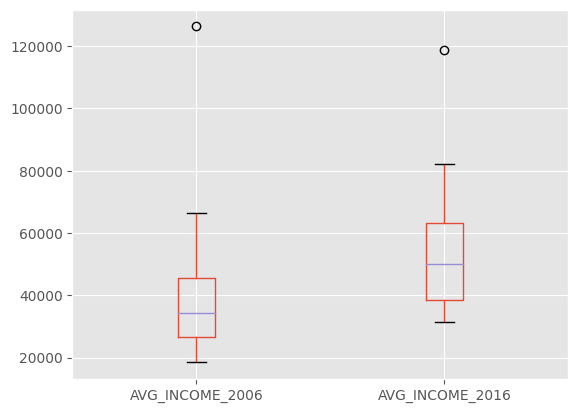

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Check boxplot for each pair of feature columns

df_census[["AVG_INCOME_2006", "AVG_INCOME_2016"]].boxplot()
plt.show()

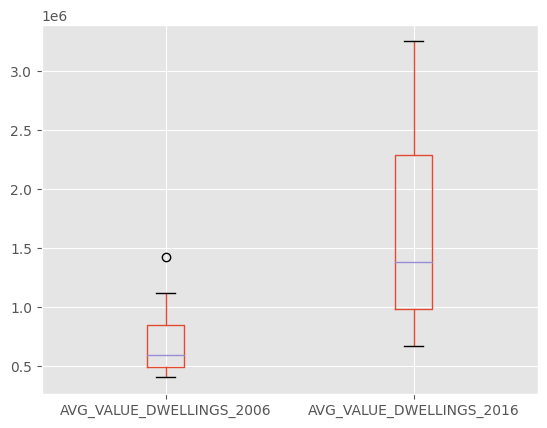

In [7]:
df_census[["AVG_VALUE_DWELLINGS_2006", "AVG_VALUE_DWELLINGS_2016"]].boxplot()
plt.show()

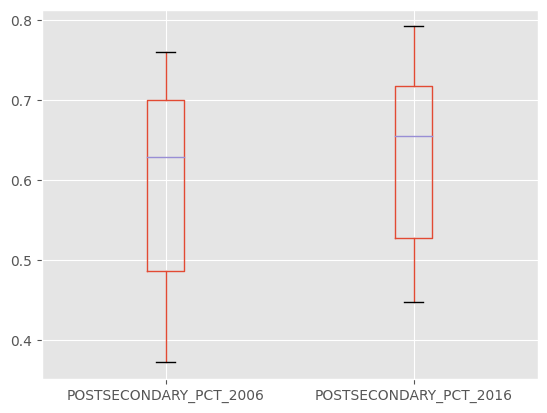

In [8]:
df_census[["POSTSECONDARY_PCT_2006", "POSTSECONDARY_PCT_2016"]].boxplot()
plt.show()

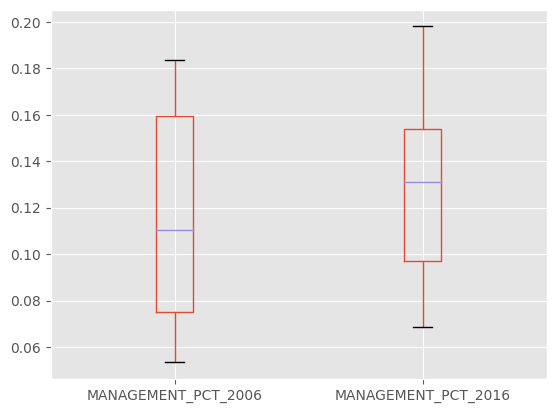

In [9]:
df_census[["MANAGEMENT_PCT_2006", "MANAGEMENT_PCT_2016"]].boxplot()
plt.show()

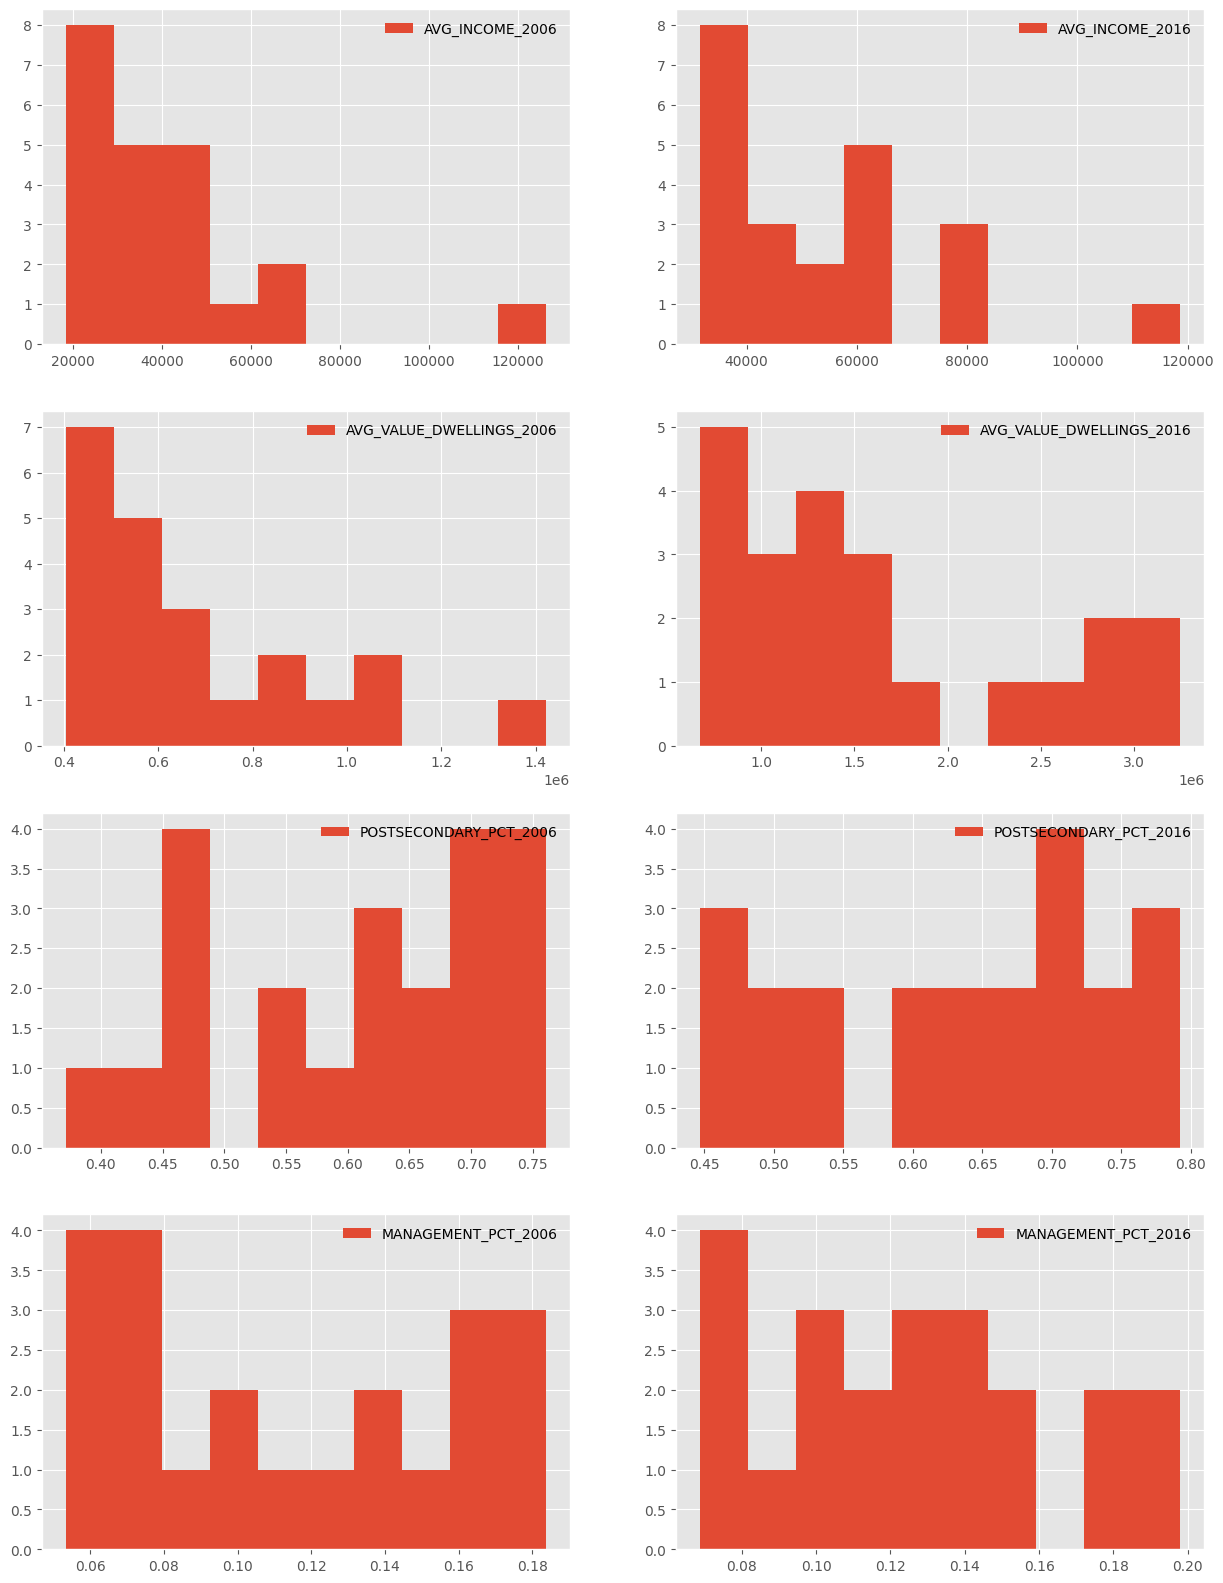

In [10]:
# create histograms

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

counter = 0
for j in range(2):
    for i in range(4):
        ax = axes[i][j]
        if counter < len(df_census.columns):
            ax.hist(df_census[df_census.columns[counter]], label=df_census.columns[counter])
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)
        counter += 1

plt.show()

# Data Scaling to Run PCA

In [11]:
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection
import numpy as np


# concatenating 2006 data vertically with 2016 data

values_2006 = census2006.values
values_2016 = census2016.values
df_concat = np.concatenate((values_2006, values_2016), axis=0)

In [12]:
# check for missing values

np.isnan(df_concat).sum()

0

In [13]:
# scale data using RobustScaler

robust_scaler = RobustScaler().fit(df_concat)
df_robust_scaler = robust_scaler.transform(df_concat)
df_robust_scaler

array([[ 2.07156178e-01,  2.89104517e-03,  6.63914540e-02,
         5.12184430e-01],
       [ 2.91278137e-02, -4.09348519e-01,  2.30278928e-01,
         6.78382665e-01],
       [ 5.80977577e-01,  1.02192215e-01,  3.27180241e-01,
         5.29591846e-01],
       [ 1.02892831e-01, -5.70003016e-01,  6.14496253e-01,
         2.68920869e-01],
       [-5.48640326e-01, -5.86504604e-01, -4.73479750e-01,
        -5.82188516e-01],
       [-5.41596912e-01, -4.27578199e-01, -9.68850716e-01,
        -6.54064211e-01],
       [-5.81810296e-01, -4.39715990e-01, -9.08865290e-01,
        -7.10664490e-01],
       [ 8.33326105e-01,  2.59423201e-01,  1.78525765e-01,
         6.15609293e-01],
       [-4.62002862e-01, -4.82506847e-01, -4.65524588e-01,
        -4.33232027e-01],
       [ 1.01262090e-01, -3.12795598e-01,  5.80559843e-01,
         1.96601153e-01],
       [-4.31157566e-01, -2.99018055e-01, -9.10389367e-02,
        -2.76091148e-01],
       [-4.33863903e-01, -6.01705281e-01, -5.03624192e-02,
      

In [14]:
# extract 2006 scaled data

df_scaled_2006 = pd.DataFrame(df_robust_scaler[0:len(census2006),], index=census2006.index, columns=list(census2006.columns))
df_scaled_2006

,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006
Arbutus-Ridge,0.207156,0.002891,0.066391,0.512184
Downtown,0.029128,-0.409349,0.230279,0.678383
Dunbar-Southlands,0.580978,0.102192,0.327180,0.529592
Fairview,0.102893,-0.570003,0.614496,0.268921
Grandview-Woodland,-0.548640,-0.586505,-0.473480,-0.582189
Hastings-Sunrise,-0.541597,-0.427578,-0.968851,-0.654064
Kensington-Cedar Cottage,-0.581810,-0.439716,-0.908865,-0.710664
Kerrisdale,0.833326,0.259423,0.178526,0.615609
Killarney,-0.462003,-0.482507,-0.465525,-0.433232
Kitsilano,0.101262,-0.312796,0.580560,0.196601


In [15]:
df_scaled_2006.to_csv("df_scaled_2006.csv", index_label='AREA')

In [16]:
# extract 2016 scaled data

df_scaled_2016 = pd.DataFrame(df_robust_scaler[0:len(census2016),], index=census2016.index, columns=list(census2016.columns))
df_scaled_2016

,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016
Arbutus-Ridge,0.207156,0.002891,0.066391,0.512184
Downtown,0.029128,-0.409349,0.230279,0.678383
Dunbar-Southlands,0.580978,0.102192,0.327180,0.529592
Fairview,0.102893,-0.570003,0.614496,0.268921
Grandview-Woodland,-0.548640,-0.586505,-0.473480,-0.582189
Hastings-Sunrise,-0.541597,-0.427578,-0.968851,-0.654064
Kensington-Cedar Cottage,-0.581810,-0.439716,-0.908865,-0.710664
Kerrisdale,0.833326,0.259423,0.178526,0.615609
Killarney,-0.462003,-0.482507,-0.465525,-0.433232
Kitsilano,0.101262,-0.312796,0.580560,0.196601


In [27]:
df_scaled_2016.to_csv("df_scaled_2016.csv", index_label='AREA')

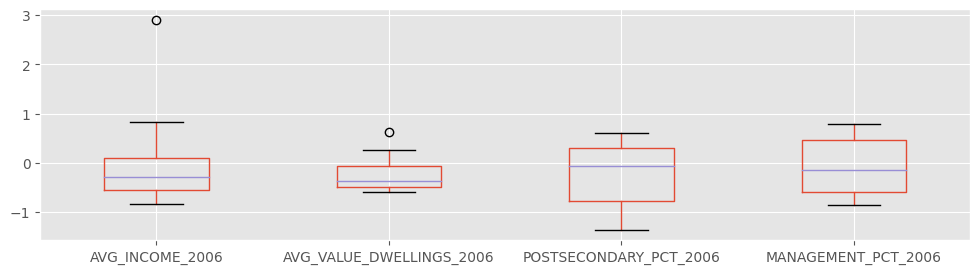

In [17]:
# visualize 2006 scaled data using boxplot

fig = plt.figure(figsize =(12, 3))

df_scaled_2006.boxplot()
plt.show()

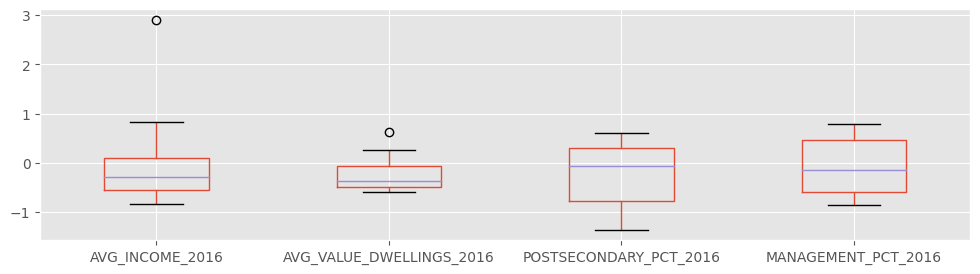

In [18]:
# visualize 2016 scaled data using boxplot

fig = plt.figure(figsize =(12, 3))

df_scaled_2016.boxplot()
plt.show()

In [19]:
# run PCA

pca = decomposition.PCA()             
pca.fit(df_robust_scaler)

# visualize eigenvalues

print(pca.explained_variance_)

[1.50192877 0.44833843 0.11228815 0.06017703]


In [20]:
#visualize expained variance ratio

print(pca.explained_variance_ratio_)

[0.70754504 0.21120818 0.05289793 0.02834886]


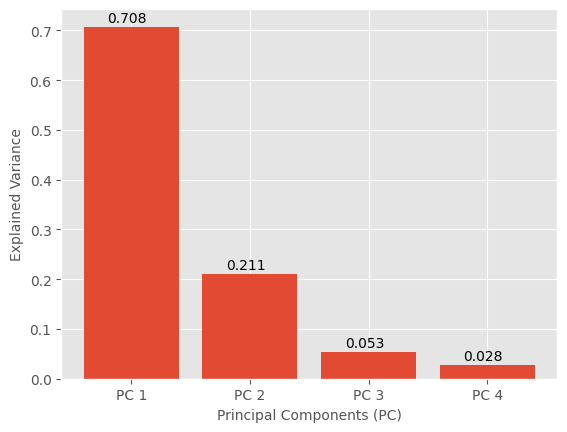

In [21]:
# visualize explained variance for each factor

plt.bar(['PC 1', 'PC 2', 'PC 3', 'PC 4'],pca.explained_variance_ratio_)

x = [1,2,3,4]

for i in range(len(pca.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = pca.explained_variance_ratio_[i] + 0.01, s = pca.explained_variance_ratio_[i].round(3), size = 10)
    
plt.xlabel('Principal Components (PC)', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

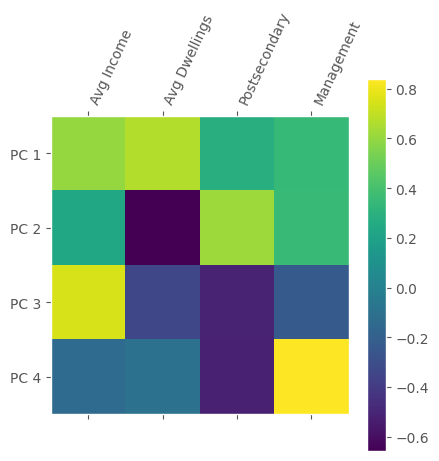

In [22]:
# visualize the constituents of each factor using heatmap

features = ["Avg Income", "Avg Dwellings", "Postsecondary", "Management"]

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=10)
plt.grid(None)

plt.show()

In [23]:
# run PCA to derive only the first principal component

pca_first = decomposition.PCA(n_components=1)              
pca_first.fit(df_robust_scaler)                      
pca_scores = pd.DataFrame(pca_first.transform(df_robust_scaler))

pca_scores.head()

,0
0,0.031587
1,-0.246712
2,0.401332
3,-0.342041
4,-1.341465


In [24]:
# extract and rename set of scores for 2006 and 2016

pca_2006 = pd.DataFrame(pca_scores.iloc[0:len(census2006),])

pca_2016 = pd.DataFrame(pca_scores.iloc[len(census2016):,])

In [25]:
# attach 2006 and 2016 scores to the main dataframe

df_score = df_census.copy()
df_score["SCORE_2006"] = pca_2006[0].values
df_score["SCORE_2016"] = pca_2016[0].values

df_score

AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016,SCORE_2006,SCORE_2016
Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358,0.031587,1.742374
Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683,-0.246712,0.598705
Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039,0.401332,2.473002
Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007,-0.342041,0.283964
Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157,-1.341465,-0.396126
Hastings-Sunrise,26916,548064,0.448524,0.069781,38258,1266054,0.470078,0.090885,-1.395032,-0.458540
Kensington-Cedar Cottage,25757,538034,0.460356,0.065291,38411,1214877,0.521713,0.079011,-1.429865,-0.474513
Kerrisdale,66543,1115764,0.674839,0.170501,77248,2879632,0.660862,0.157936,0.645385,2.214694
Killarney,29210,502674,0.547803,0.087299,39013,1097209,0.544681,0.095779,-1.166883,-0.451555
Kitsilano,45444,642914,0.754139,0.137262,63092,1327707,0.766710,0.141397,-0.206194,0.748853


In [26]:
df_score.to_csv("df_score.csv", index_label='AREA')